<a href="https://colab.research.google.com/github/franciscoventurablancas/CIC_IPN/blob/development/EndToEndHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de precios de casas en California

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.externals import joblib
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


### Importar dataset en formato csv

La función read_csv regresa un objeto tipo DataFrame

In [ ]:
# Cargar archivo desde gdrive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#read file from gdrive
df=pd.read_csv('/content/drive/MyDrive/Curso ML 2021/housing.csv')

#Cargar archivo desde local

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving housing.csv to housing.csv


In [ ]:
#load file from local
housing = pd.read_csv('housing.csv')

La función head() regresa los primeros 5 renglones del DataFrame


Prueba con:
    DataFrame.head(10), 
    DataFrame.tail()

In [ ]:
housing.head() #Visualizar las primeras 5 filas del dataFrame

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing["ocean_proximity"].value_counts() #Para datos categóricos contar las diferentes clases de un atributo

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.describe() #Resumen de atributos numéricos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Visualización de datos con histogramas 

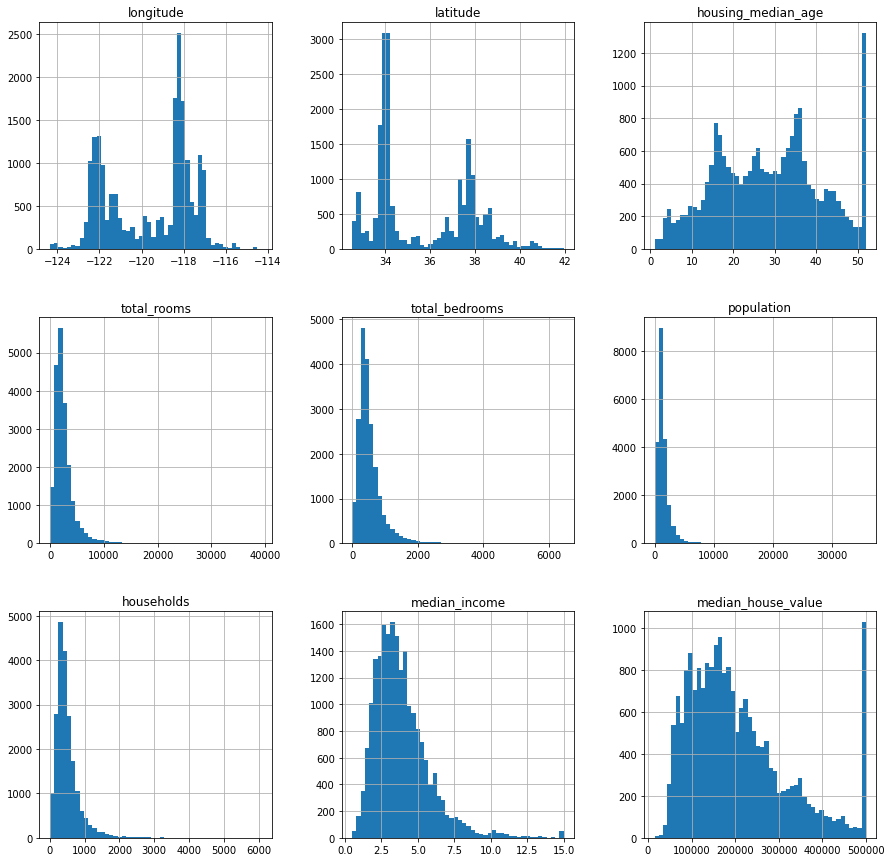

In [ ]:
%matplotlib inline 
#Solo para jupyter y usa su propio backend para las gráficas

import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize=(15,15))
plt.show()

### Dividir datos en entrenamiento y prueba 

In [ ]:
#función de sklearn
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(housing, housing['median_house_value'], test_size=0.2, random_state=69)

In [ ]:
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 2578 to 4041
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16343 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 9995 to 10004
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null  

### Visualizar datos geográficos 

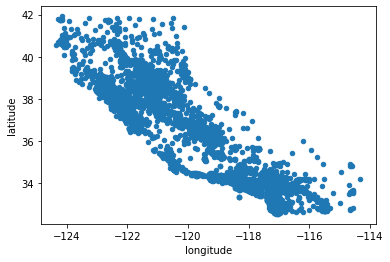

In [ ]:
X_train.plot(kind="scatter", x="longitude", y="latitude")

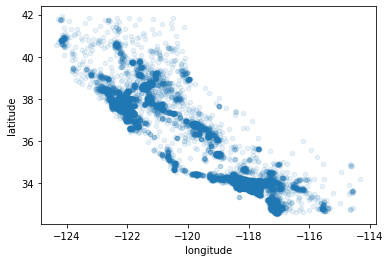

In [ ]:
X_train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

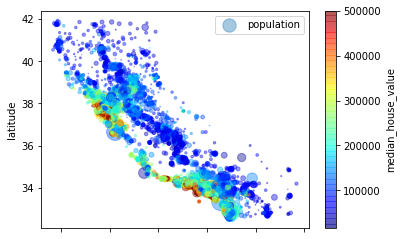

In [ ]:
X_train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=X_train["population"]/100, label="population",
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             )
plt.legend()

### Buscar correlaciones 

In [ ]:
corr_matrix = X_train.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.685938
total_rooms           0.132513
housing_median_age    0.111155
households            0.067014
total_bedrooms        0.050915
population           -0.024438
longitude            -0.044454
latitude             -0.147234
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f098f439690>,
      dtype=object)

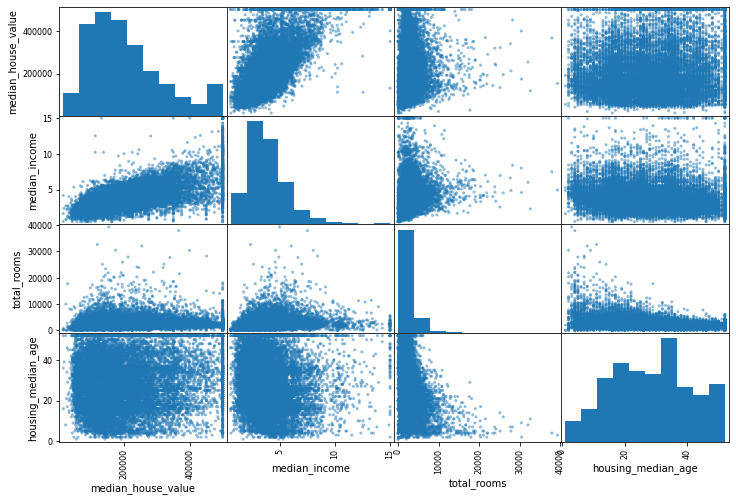

In [ ]:
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(X_train[attributes], figsize=(12, 8))

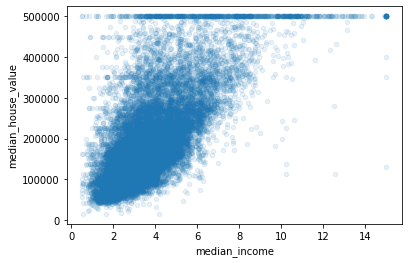

In [ ]:
X_train.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

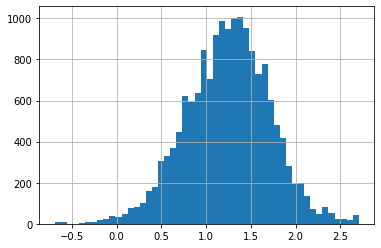

In [ ]:
np.log(X_train["median_income"]).hist(bins = 50)

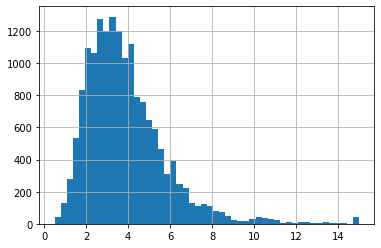

In [ ]:
X_train["median_income"].hist(bins = 50)

### Preprocesamiento de datos de entrenamiento 

In [ ]:
X_data = X_train.drop("median_house_value", axis=1) #eliminar 

In [ ]:
nom_attribs= list(X_data.columns)
nom_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity']

In [ ]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 2578 to 4041
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16343 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


#Preparar los datos para los algorimos de ML
* Limpieza de datos
* Manejo de textos y atributos categóricos
* Transformadores personalizados
* Escalado de características
* Tuberías de transformación


### ¿Qué hacer con datos faltantes?
* Eliminarlos
* Eliminar el atributo completo
* Fijar valor deteminado(0, media, mediana,...)

In [ ]:
#X_data.dropna(subset=["total_bedrooms"])     # option 1
#X_data.drop("total_bedrooms", axis=1)        # option 2
median = X_data["total_bedrooms"].median()     # option 3
X_data["total_bedrooms"] = X_data["total_bedrooms"].fillna(median)

### Creación de nuevos atributos 
* Atributos por sí solos pueden no dar suficiente información. Al transformar ciertos atributos, incrementa la correlación con nuestro objetivo

* Esta combinación dependerá y cambiará en cada proyecto

* Es una forma de preparar los datos para los algoritmos de Machine learning



In [ ]:
X_data["rooms_per_household"] = X_data["total_rooms"] / X_data["households"]
X_data["bedrooms_per_room"] = X_data["total_bedrooms"] / X_data["total_rooms"]
X_data["population_per_household"] = X_data["population"] / X_data["households"]

Eliminamos el atributo categórico para darle un tratramiento diferente, hacemos esto antes de normalizar o escalar los datos

In [ ]:

data_cat = X_data[["ocean_proximity"]]#Eliminar columna categórica
data_num = X_data.drop("ocean_proximity", axis=1)

### Escalamiento de datos numéricos 
* Algoritmos de ML no se desempeñan bien con escalas diferentes
* Existen dos formas para obtener atributos con la misma escala:
  * **Min-Max scaling(normalización)**: Valores entre un rango de 0 a 1  
  $minmax = \frac{X-min}{max-min}$
  * **Standardization**: Valores escalados con base a valor medio, no son . Media 0 y varianza 1

    $Std = \frac{X-\bar{X}}{\sigma^{2} } $

Scikit-Learn cuenta con MinMaxScaler y StandardScaler para escalar los datos




In [ ]:
#Eliminar datos categoricos 
scaler = StandardScaler()
print(scaler.fit(data_num))
data_scaled = scaler.transform(data_num)

StandardScaler(copy=True, with_mean=True, with_std=True)


### Tratamiento de datos categóricos 

* Alternativa 1: Valores cardinales
* Alternativa 2: Valores binarios **one-hot encoding**

In [ ]:
X_data["ocean_proximity"].value_counts()

<1H OCEAN     7304
INLAND        5251
NEAR OCEAN    2112
NEAR BAY      1841
ISLAND           4
Name: ocean_proximity, dtype: int64

In [ ]:
#lab_encoder = LabelEncoder()
#lab_encoder.fit(data_cat)
#data_cat_encoded = lab_encoder.transform(data_cat)

In [ ]:
Std = \frac{X-\bar{X}}{\sigma^{2} }

In [ ]:
encoder = OneHotEncoder()
data_cat_1hot = encoder.fit_transform(data_cat)

In [ ]:
data_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [ ]:
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
num_cat = len(data_cat_1hot.toarray()[0])
num_cat

5

In [ ]:
data_cat_1hot #matriz dispersa

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [ ]:
data_cat_1hot.toarray() #Transformar a numpy array

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])

Para texto o valores categóricos muy grandes one-hot encoding resulta muy costoso. Alternativamente hay otras técnicas como aprender una reducción dimensional de un vector llamado *embedding*.

# ¡Todo listo para seguir con los modelos!

In [ ]:
#Datos listos para algoritmos de ML
housing_prepared = np.concatenate((data_scaled, data_cat_1hot.toarray()), axis=1)

In [ ]:
housing_prepared[0]

array([-2.24363848,  2.44789479,  0.42273462,  0.69952812, -0.24337766,
        0.40516143,  0.43563783, -0.33941591,  0.33138448, -1.66286494,
       -0.02179996,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ])

In [ ]:
housing_prepared[0].shape

(16,)

In [ ]:
housing_prepared.shape

(16512, 16)

In [ ]:

df=pd.DataFrame(data=housing_prepared[0:,0:],
        index=[i for i in range(housing_prepared.shape[0])],columns=['f'+str(i) for i in range(housing_prepared.shape[1])])

print(df['f4'].describe())


count    1.651200e+04
mean     8.045326e-17
std      1.000030e+00
min     -1.268307e+00
25%     -5.669153e-01
50%     -2.433777e-01
75%      2.501944e-01
max      1.394977e+01
Name: f4, dtype: float64


# Entrenamiento de modelos de ML

### Regresión lineal

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(y_train, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print("Error promedio:",lin_rmse)

Error promedio: 68128.792117365


El modelo hace underfitting del conjunto de entrenamiento, se necesita un modelo más poderoso o reducir las restricciones sobre este modelo ó incluso agregar más atributos

### Árbol de decisión 
Es capaz de encontrar relaciones complejas no lineales 

In [ ]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(y_train, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print("Error promedio:",tree_rmse)

Error promedio: 0.0


Es un claro ejemplo de overfitting

###  Validación cruzada
10-fold cross validation

**neg_mean_squared_error** La API unificada para ejecutar cross_val_scores y gridSearchCV busca maximizar el score, funciones como MSE  son negados.

In [ ]:
scores = cross_val_score(tree_reg, housing_prepared, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [ ]:
rmse_scores

array([72663.39858213, 70536.01309443, 69200.43756082, 68951.62565423,
       63885.57511556, 69858.58254517, 69119.43008437, 70406.72019067,
       71781.53726902, 69979.07920596])

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [ ]:
display_scores(rmse_scores)

Scores: [71057.28294728 72053.89286272 69524.86260039 69035.92435661
 64414.65421253 67184.93950183 68804.37954097 71367.44689192
 70804.55662028 69321.03774596]
Mean: 69356.89772804899
Standard deviation: 2142.057159620184


El árbol de decisión parece no ser una buena opción

In [ ]:
#Cross-validaton con regresión lineal
lin_scores = cross_val_score(lin_reg, housing_prepared, y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71914.27123903 71275.56454314 67512.80389878 72628.34927248
 65453.06903783 68707.40424276 65696.8826479  67350.13187691
 67095.83340055 66443.24268866]
Mean: 68407.75528480553
Standard deviation: 2490.0229413591655


### Random Forest 
Funciona con muchos árboles de decisiónsobre subconjuntos de características y promediando las predicciones 

In [ ]:
#Regresión con random forest
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(y_train, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print("Error promedio:",forest_rmse)

Error promedio: 18411.458582499003


In [ ]:
forest_scores = cross_val_score(forest_reg, housing_prepared, y_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51047.19374239 52278.45573753 50415.84667214 51804.06237239
 47106.6524903  48275.1544336  48240.32658777 48131.62377907
 51476.59213517 48903.06390644]
Mean: 49767.8971856807
Standard deviation: 1746.260375872667


El error en el entrenamiento es muy bajo comparado con cross-validation.

Necesitaremos aplicar Regularización para evitar overfitting ó conseguir más datos ó intentar otros modelos

### Guardar modelo 

In [ ]:
!pwd 

/content


In [ ]:
joblib.dump(forest_reg, "my_model.pkl")
# cargar modelo
my_model_loaded = joblib.load("my_model.pkl")

### Búsqueda de mejores parámetros 
#### Grid Search

Busqueda exhaustiva entre un conjunto de hiperparámetros y evaluar con cross validation



Una secuencia de diccionarios de parámetros es útil para hacer exploración de parámetros

In [ ]:
#Búsqueda de parámetros
param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}, ]

In [ ]:
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

Del primer diccionario se hace una búsqueda entre 3x4 = 12 posibles combinaciones

Del segundo diccionario 2x3 =6

12+6 = 18 busquedas por los mejores parámetros
18*5 = 90 (cross validation)


In [ ]:
grid_search.fit(housing_prepared, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
print("Grid mejores parámetros: ",grid_search.best_params_)
print("Grid mejor estimador: ",grid_search.best_estimator_)

Grid mejores parámetros:  {'max_features': 6, 'n_estimators': 30}
Grid mejor estimador:  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [ ]:
cvres = grid_search.cv_results_
print("Resultados de Grid search")
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

Resultados de Grid search
63418.212828546486 {'max_features': 2, 'n_estimators': 3}
55226.06072538417 {'max_features': 2, 'n_estimators': 10}
52831.810603554484 {'max_features': 2, 'n_estimators': 30}
60453.50252405481 {'max_features': 4, 'n_estimators': 3}
52324.64300233772 {'max_features': 4, 'n_estimators': 10}
50008.30288623738 {'max_features': 4, 'n_estimators': 30}
58594.6686431337 {'max_features': 6, 'n_estimators': 3}
51807.033527853346 {'max_features': 6, 'n_estimators': 10}
49465.74267646374 {'max_features': 6, 'n_estimators': 30}
58097.17589653542 {'max_features': 8, 'n_estimators': 3}
51468.17962358437 {'max_features': 8, 'n_estimators': 10}
49506.401560515595 {'max_features': 8, 'n_estimators': 30}
62481.34976514982 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53645.79756778759 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59343.42065063084 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51881.31348813001 {'bootstrap': False, 'max_fea

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
print("Importancia de características:",feature_importances)

Importancia de características: [7.66862308e-02 6.57059558e-02 4.20601176e-02 1.74341192e-02
 1.70388042e-02 1.77949648e-02 1.64204579e-02 3.44651140e-01
 6.00905287e-02 6.46267638e-02 1.07517290e-01 1.25531205e-02
 1.49176922e-01 2.87536116e-04 2.60287732e-03 5.35317030e-03]


In [ ]:
#list(lab_encoder.classes_)
encoder.categories_[0][0]

'<1H OCEAN'

In [ ]:
##"""cat_one_hot_attribs=[]
#for i in list(range(0, num_cat)):
#    cat_one_hot_attribs.append("f"+str(i))
#"""

In [ ]:
nom_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity']

In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.categories_[0])
attributes = nom_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.34465114049054174, 'median_income'),
 (0.14917692217851164, '<1H OCEAN'),
 (0.10751729025992726, 'pop_per_hhold'),
 (0.0766862308442524, 'longitude'),
 (0.06570595578279106, 'latitude'),
 (0.0646267638191846, 'rooms_per_hhold'),
 (0.06009052871605393, 'ocean_proximity'),
 (0.042060117570420524, 'housing_median_age'),
 (0.01779496478999001, 'population'),
 (0.017434119203659705, 'total_rooms'),
 (0.01703880417435914, 'total_bedrooms'),
 (0.01642045791333004, 'households'),
 (0.012553120518186989, 'bedrooms_per_room'),
 (0.0053531703033602995, 'NEAR BAY'),
 (0.0026028773191273022, 'ISLAND'),
 (0.0002875361163034449, 'INLAND')]

### Mejor modelo despues de búsqueda exhaustiva 

In [ ]:
final_model = grid_search.best_estimator_

# Procesamiento de datos de prueba

¡Nota! Para completar datos faltantes y escalar los datos numéricos se hace con la media, mediana,desviación estandar,etc. Del dataset de entrenamiento. 

In [ ]:
X_data_test = X_test.drop("median_house_value", axis=1)  # eliminadatos
# Rellenar datos vacíos

X_data_test["total_bedrooms"] = X_data_test["total_bedrooms"].fillna(median)

# Agregar nuevos atributos
X_data_test["rooms_per_household"] = X_data_test["total_rooms"] / X_data_test["households"]
X_data_test["bedrooms_per_room"] = X_data_test["total_bedrooms"] / X_data_test["total_rooms"]
X_data_test["population_per_household"] = X_data_test["population"] / X_data_test["households"]

# Trabajar datos categóricos
data_test_cat = X_data_test[["ocean_proximity"]]  # Eliminar columna categórica
data_test_num = X_data_test.drop("ocean_proximity", axis=1)

# escalar datos
data_test_scaled = scaler.transform(data_test_num)
print()
# transformar datos categóricos
data_test_cat_1hot = encoder.fit_transform(data_test_cat)

X_test_prepared = np.concatenate((data_test_scaled, data_test_cat_1hot.toarray()), axis=1)

In [ ]:
print(X_test_prepared.shape)
print(len(y_test))

(4128, 16)
4128


### Probar datos procesados de prueba en mejor modelo 

In [ ]:
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print("Final: ",final_rmse)

Final:  50429.5672522408


In [ ]:
final_predictions[:5]

array([168113.33333333, 181820.        , 301063.36666667,  62460.        ,
       260456.7       ])

In [ ]:
y_test[:5]

9995     164500.0
5120     117400.0
11002    286600.0
19854     68600.0
5427     450000.0
Name: median_house_value, dtype: float64

# Ejercicio
Intenta con SVM
Crea tus diccionarios de parámetros con los siguientes valores:


1.   {'kernel': ['linear'], 
      'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]} 
2.   {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
      'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}

        
Busca en scikit learn otros algoritmos que puedas usar para Regresión



In [ ]:
#Reemplaza None con la instrucción correcta 
from sklearn.model_selection import GridSearchCV
from sklearn import svm

#param_grid=None
param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = svm.SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ C=10.0, kernel=linear, total=   8.6s
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.6s remaining:    0.0s


[CV] ............................ C=10.0, kernel=linear, total=   8.6s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   8.5s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   8.5s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   8.5s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   9.0s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   8.5s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   9.1s
[CV] C=30.0, kernel=linear ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 58.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
print("Grid mejores parámetros: ",grid_search.best_params_)
print("Grid mejor estimador: ",grid_search.best_estimator_)

NameError: ignored

In [ ]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse